Nota aclaratoria:

1) En el ejercicio 5 solicitan que apliquemos alguna técnica de ingeniería como: normalización, escalado...etc. Por lo tanto, en los ejercicios 1 al 4, no se aplicara ningún escalado.

2) La forma correcta para realizar los procesos sería mediante un pipeline, en estos ejercicios no se hara uso de esta herramienta.

In [1]:
#Importamos las librerias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)



In [2]:
wine = pd.read_csv("wineData.txt", index_col = None, header = None)
wine.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
cols=["cultivars","alcohol", "aalic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", 
              "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted wines", "proline"]
wine.columns= cols
wine.head(5)

,cultivars,alcohol,aalic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Descripción de variables

Informacion relevante:

* Estos datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivares diferentes.
       
* El análisis determinó las cantidades de 13 constituyentes que se encuentran en cada uno de los tres tipos de vinos.

Descripción de las variables:

>* **Alcohol:** La cantidad de alcohol en el vino, medida en porcentaje de volumen.

>* **Malic acid:** La cantidad de ácido málico presente en el vino, medida en gramos por litro. El ácido málico afecta la acidez y el sabor del vino, y su nivel puede variar dependiendo de la variedad de uva utilizada.

>* **Ash:** La cantidad de cenizas en el vino, medida en gramos por litro.

>* **Alcalinity of ash:** La alcalinidad de las cenizas, medida en meq/l (miliequivalentes por litro). 

>* **Magnesium:** La concentración de magnesio en el vino, medida en miligramos por litro. 

>* **Total phenols:** La cantidad total de compuestos fenólicos presentes en el vino, medida en unidades arbitrarias.

>* **Flavanoids:** La concentración de flavonoides en el vino, medida en miligramos por litro.

>* **Nonflavanoid phenols:** La cantidad de compuestos fenólicos no flavonoides presentes en el vino, medida en miligramos por litro. 

>* **Proanthocyanins:** La concentración de proantocianidinas en el vino, medida en miligramos por litro. 

>* **Color intensity:** La intensidad del color del vino, medida mediante métodos espectrofotométricos. Proporciona una indicación de la profundidad y la oscuridad del color del vino.

>* **Hue:** El matiz del color del vino, medida en grados. Puede dar información sobre las tonalidades y variaciones de color, especialmente en los vinos tintos.

>* **OD280/OD315 of diluted wines:** La relación entre la absorbancia de luz a 280 nm y 315 nm en el vino diluido. 

>* **Proline:** La cantidad de proline (un aminoácido) presente en el vino, medida en miligramos por litro. 
        

## Limpieza de datos 

* Nulos
* Vacíos
* Duplicados

In [4]:
wine.isnull().sum()

cultivars                       0
alcohol                         0
aalic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted wines    0
proline                         0
dtype: int64

In [5]:
wine.isna().sum()

cultivars                       0
alcohol                         0
aalic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted wines    0
proline                         0
dtype: int64

In [6]:
wine.loc[wine.duplicated()]

,cultivars,alcohol,aalic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline


* **No se encuentran valores duplicados, vacios o nulos en la lista.**

## Exploración inicial
### Análisis de la columna target

El target en este ejercicio es la columna "Cultivars", que indica el viñedo del cual proviene el cultivo. A continuación, analizaremos un un poco más los datos de esta variable.

In [7]:
#Número de registros por cada cultivo

wine.cultivars.value_counts().sort_values(ascending=False)

cultivars
2    71
1    59
3    48
Name: count, dtype: int64

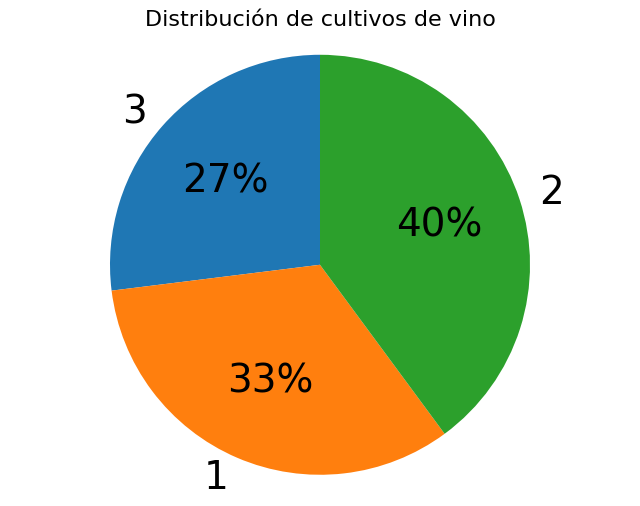

In [8]:
import matplotlib.pyplot as plt

# Valores y etiquetas
values = wine.cultivars.value_counts().sort_values().values
labels = wine.cultivars.value_counts().sort_values().index

# Configurar el gráfico de pie
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 28})

# Ajustar aspectos visuales (opcional)
plt.axis('equal')  # Hace que el gráfico de pie sea circular
plt.title('Distribución de cultivos de vino', fontsize=16)

# Mostrar el gráfico
plt.show()


> El gráfico nos indica que el 40% de los vinos provienen del cultivo nombrado como 2. En segundo lugar esta el vino proviente del cultivo 1. Y por último con 27%, esta el vino proveniente del cultivo 3.

### Análisis del dataSet en general

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivars                     178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   aalic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted wines  178 non-null    float64
 13  proli

> Todas las variables son númericas, 3 de ellas de tipo int y 10 de tipo float.

In [10]:
wine.describe().round(2)

,cultivars,alcohol,aalic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


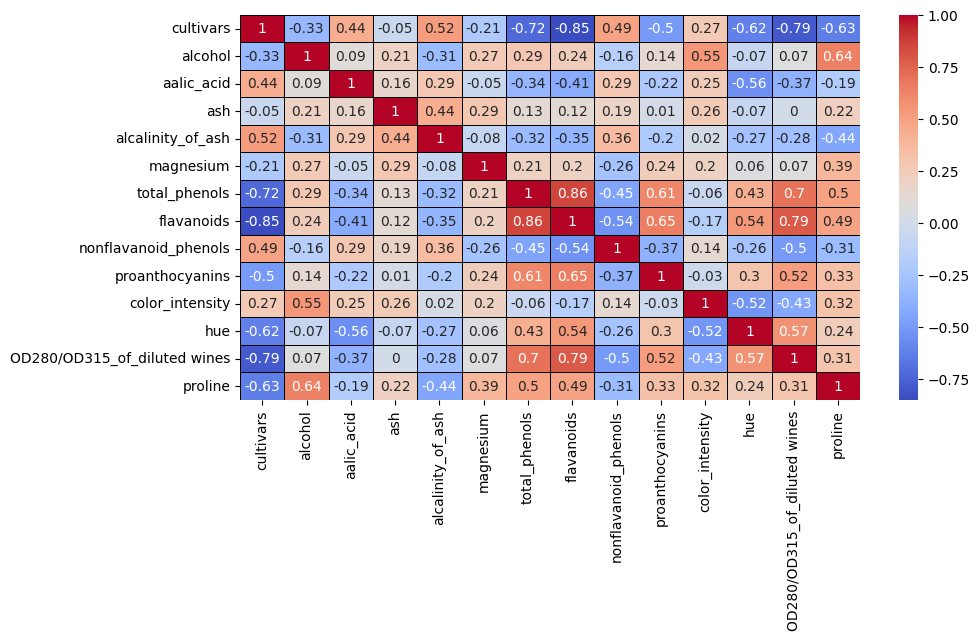

In [11]:
# De forma exploratoria realizamos un heatmap para observar la relación de las variables de forma inicial
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(wine.corr().round(2), annot=True, linewidths=.5, cmap="coolwarm", linecolor='black')

# Mostramos el gráfico
plt.show()

> Las variables que más se correlacionan con el target(cultivars) son OD280/OD315_of_diluted wines(-0.79), flavanoids(-0.85) y total_phenols(-0.72).

In [12]:
# Gráficos de distribución y outliers de las variables

<Figure size 640x480 with 0 Axes>

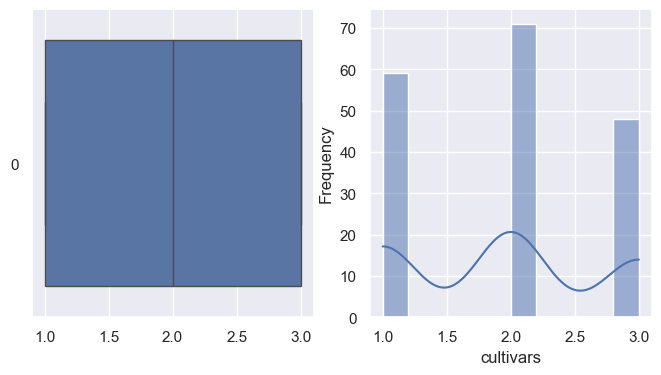

<Figure size 800x400 with 0 Axes>

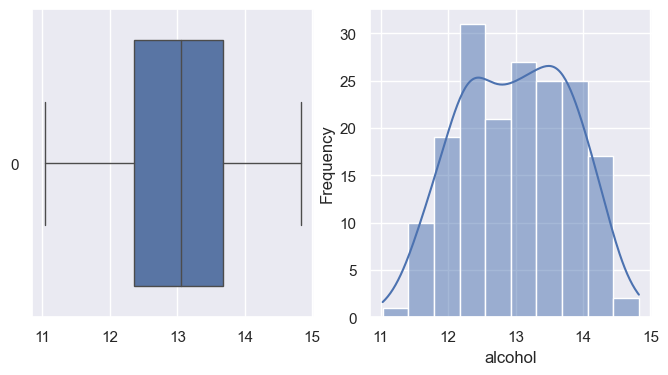

<Figure size 800x400 with 0 Axes>

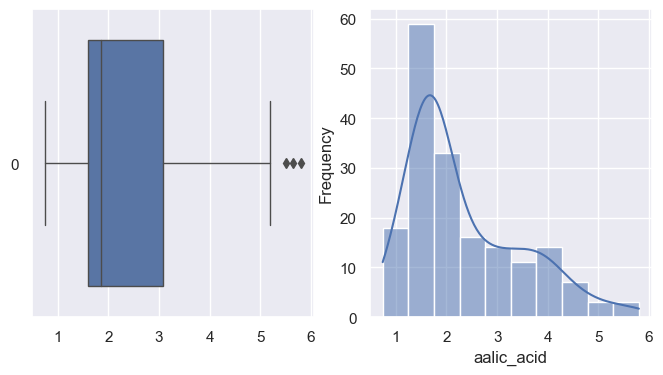

<Figure size 800x400 with 0 Axes>

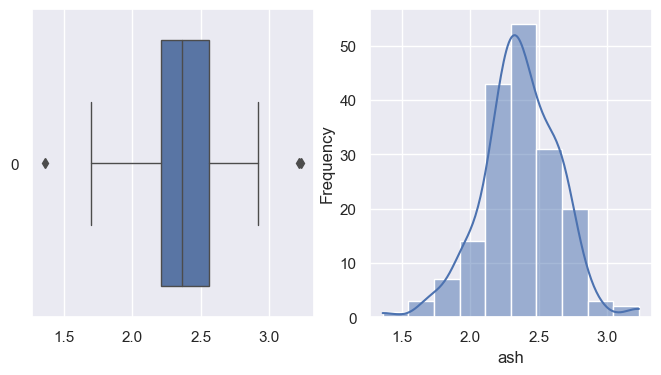

<Figure size 800x400 with 0 Axes>

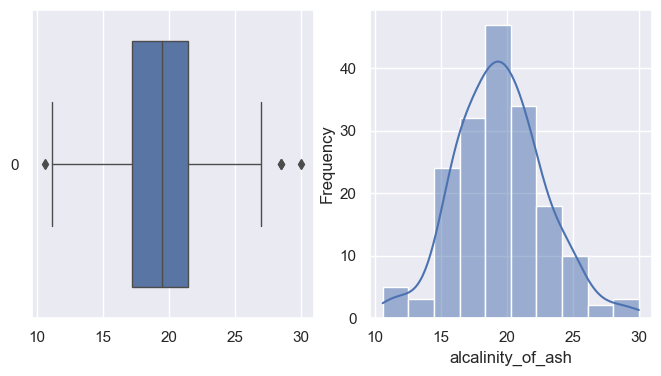

<Figure size 800x400 with 0 Axes>

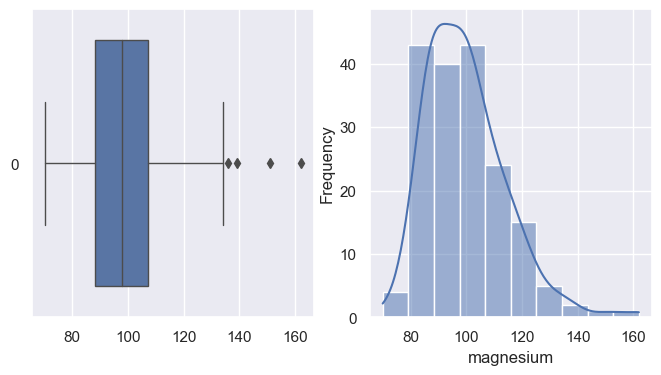

<Figure size 800x400 with 0 Axes>

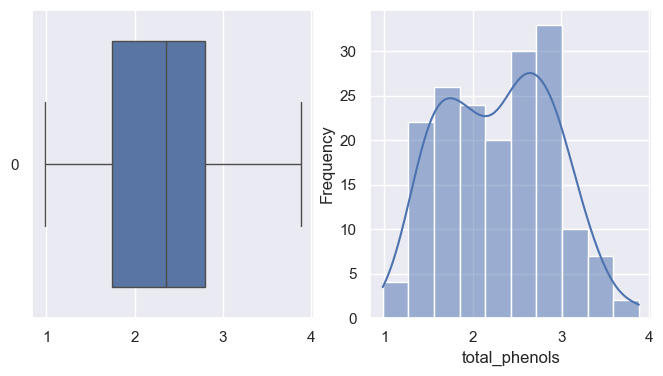

<Figure size 800x400 with 0 Axes>

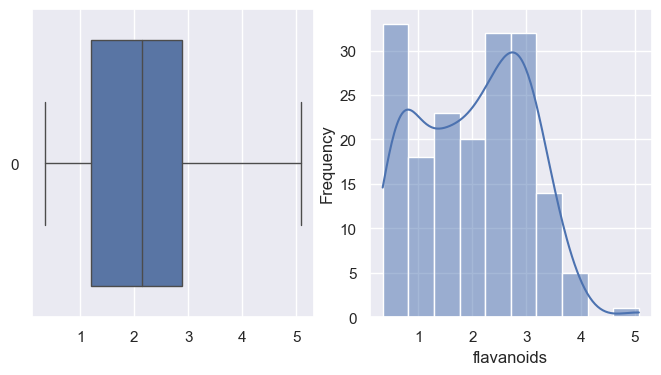

<Figure size 800x400 with 0 Axes>

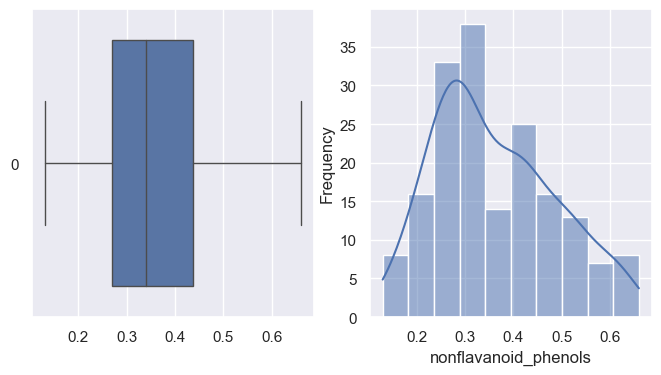

<Figure size 800x400 with 0 Axes>

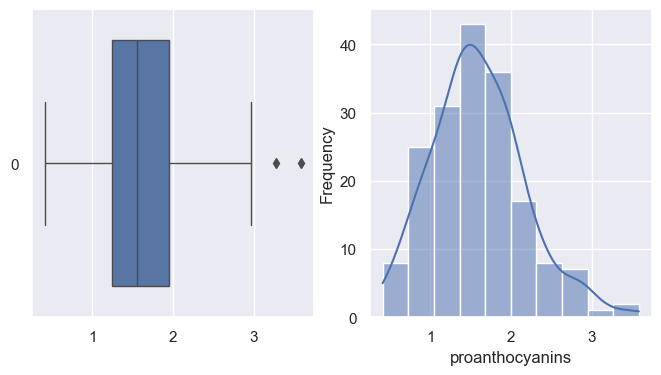

<Figure size 800x400 with 0 Axes>

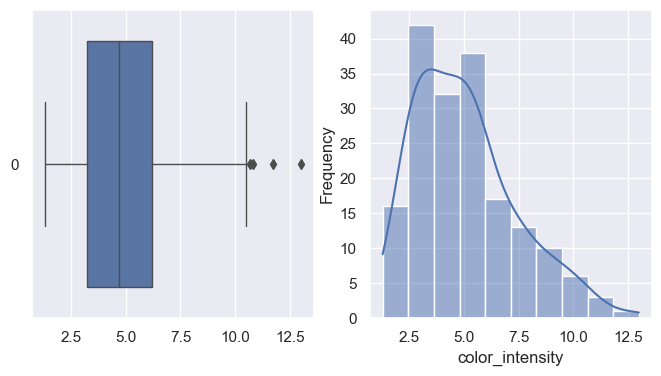

<Figure size 800x400 with 0 Axes>

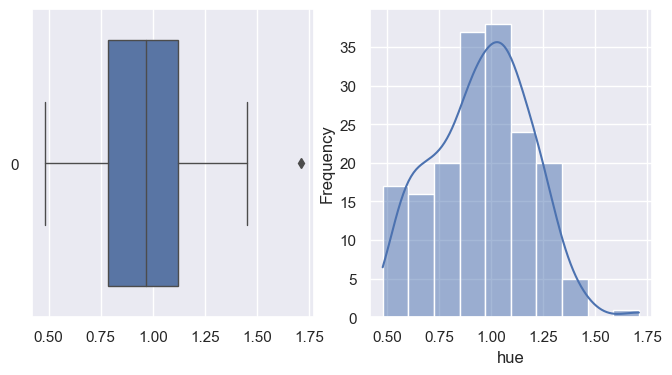

<Figure size 800x400 with 0 Axes>

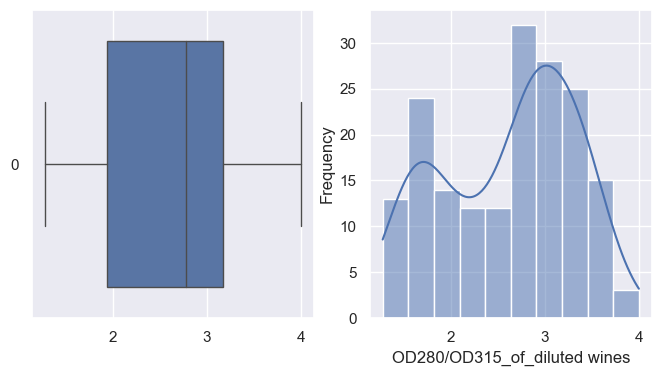

<Figure size 800x400 with 0 Axes>

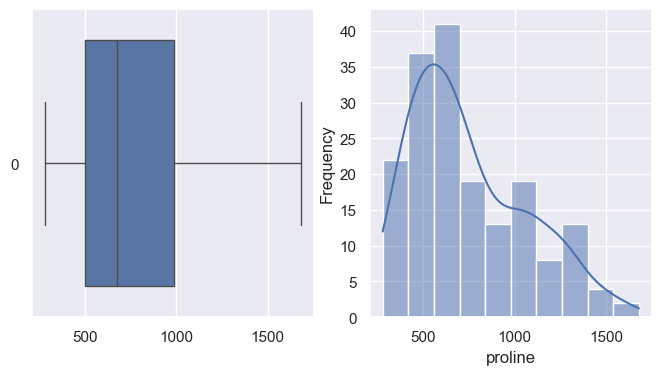

In [13]:
for i in wine.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 4)})
    f, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(wine[i],  ax=ax_box , linewidth= 1.0,orient='h')
    sns.histplot(wine[i], ax=ax_hist , bins = 10,kde=True)

# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

Existen muchos modelos de clasificación como:

* KNN
* Arbol de clasificación
* Support Vector Machine
* Random forest
* XG Boost

En este caso utilizaremos KNN, Support Vector Machine y Arbol de de clasificación.

In [14]:
# División de los datos
X = wine.drop(['cultivars'],axis=1) # Variables
y = wine['cultivars'] #Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Support Vector Machine

In [15]:
from sklearn import svm

svc = svm.SVC(random_state=42) # Creación del modelo
svc.fit(X_train, y_train) #Entrenamiento
y_pred_svc = svc.predict(X_test) # Predicción
y_pred_svc[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

## KNN

In [16]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

# Knn model and prediction
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn[0:5]

array([3, 1, 3, 1, 2], dtype=int64)

## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)
y_pred_dt[0:5]

array([1, 1, 3, 1, 2], dtype=int64)

# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

### Accuracy

In [18]:
from sklearn.metrics import accuracy_score

ac_svc= accuracy_score(y_test, y_pred_svc)
ac_knn= accuracy_score(y_test, y_pred_knn)
ac_dt= accuracy_score(y_test, y_pred_dt)


metricas = pd.DataFrame({'Modelo': ['Support Vector Machine', 'KNN','Arbol de clasificación'],
                        'Accuracy': [ac_svc, ac_knn, ac_dt]})
metricas.round(2)

,Modelo,Accuracy
0,Support Vector Machine,0.81
1,KNN,0.72
2,Arbol de clasificación,0.94


> Basados en el accuracy el mejor modelo es el **Arbol de clasificación**, seguido del support vector machine, por último tenemos el KNN. Más adelante indicaremos algunos parámetros para mejorar su resultado.

## Matriz de confusión

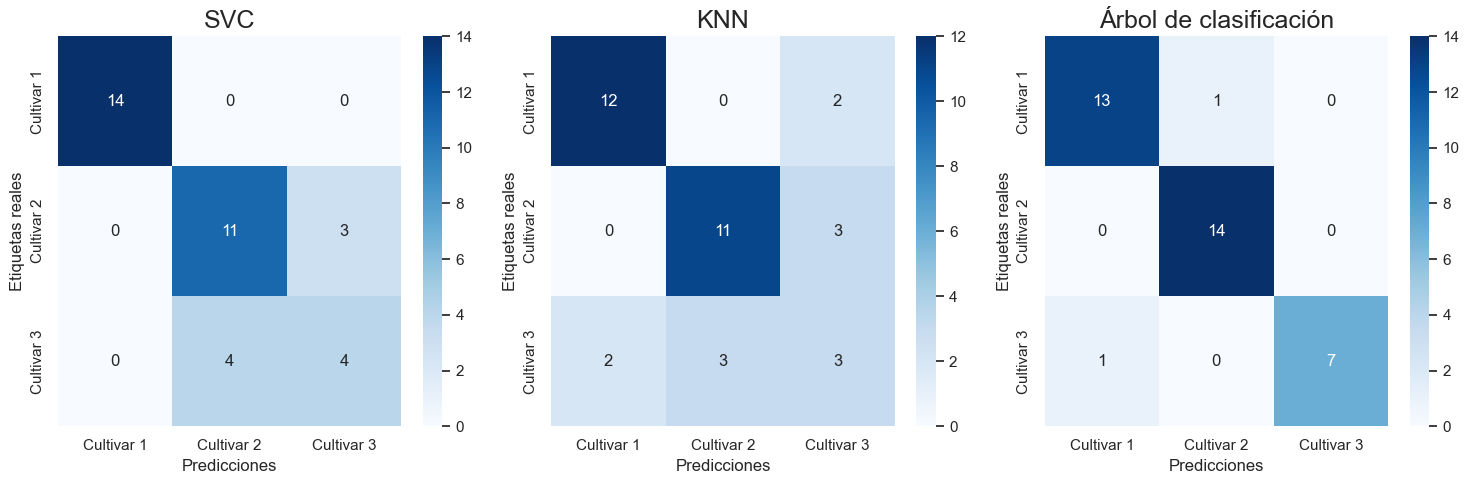

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm_svc=confusion_matrix(y_test, y_pred_svc)
cm_knn=confusion_matrix(y_test, y_pred_knn)
cm_dt=confusion_matrix(y_test, y_pred_dt)

# Graficas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

class_names = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']
model_names = ['SVC', 'KNN', 'Árbol de clasificación']

for i, cm in enumerate([cm_svc, cm_knn, cm_dt]):
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[i], xticklabels=class_names, yticklabels=class_names)
    
    axes[i].set_title('{}'.format(model_names[i]), fontsize=18)
    axes[i].set_xlabel('Predicciones')
    axes[i].set_ylabel('Etiquetas reales')

plt.tight_layout()
plt.show()




> La matriz de confusión es muy útil para observar en que clase se realizaron mejor las predicciones.  

>  **Cultivars 1**: El que mejor predice la clase=cultivars 1 es el SVC. Son 14 predicciones correctas, sería el 100%. 

>  **Cultivars 2**: Sin embargo para predicir si proviene del cultivo 2 es mejor el arbol de clasificación(14), el 100%.

> **Cultivaras 3**:El árbol de clasificación también es el mejor para predicir los cultivars 3 (7), en este caso 88%.

## Otras métricas
* Precision
* Recall
* F1-score (es la combinación de precisión y recall)

In [57]:
from sklearn.metrics import f1_score
f1_svc = f1_score(y_test, y_pred_svc, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

In [20]:
from sklearn.metrics import classification_report
print('***********************************************************************')
print('Métricas para Suppor Vector Machine')
print(classification_report(y_test, y_pred_svc))
print('***********************************************************************')
print('Métricas para KNN')
print(classification_report(y_test, y_pred_knn))
print('***********************************************************************')
print('Métricas para Arbol de clasificación')
print(classification_report(y_test, y_pred_dt))

***********************************************************************
Métricas para Suppor Vector Machine
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.73      0.79      0.76        14
           3       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

***********************************************************************
Métricas para KNN
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.79      0.79      0.79        14
           3       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

****************************************

> La métrica de precisión nos indica el porcentaje de acierto en no tener falsos positivos. Y el recal el % de falsos negativos. Como los dos aspectos son importantes, existe una métrica que combina los dos conceptos como lo es eL f1-score. Al analizar mediante esta métrica de igual forma tenemos como modelo ganador al Arbol de clasificación(macro avg=0.94), en segundo lugar al SVM(macro avg=0.76) y en tercero al KNN(macro avg=0.67). Sin embargo con valores inferiores al accuracy.

# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

## Mejora de parámetros SVC

In [31]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### GridSearchCV (SVC) 

In [64]:
from sklearn.model_selection import GridSearchCV
svc_grid = svm.SVC(random_state=42) # Declaramos de nuevo el modelo para no trabajar con el modelo que ya estaba entrenado y hacer overfitting

param_svc = {'C': [1, 5, 10, 0.5], 
             'coef0': [0.0, 0.5, 1],  
             'gamma': ('scale', 'auto'),
             'kernel': ('poly', 'linear', 'rbf', 'sigmoid')}

gs_svc=  GridSearchCV(
                    estimator=svc_grid, 
                    param_grid=param_svc,
                    scoring = 'f1_macro')

gs_svc.fit(X, y)

# Imprimimos los parámetros ganadores
print("Best Score F1", gs_svc.best_score_)
print("Los mejores parámetros son:", gs_svc.best_params_)

Best Score F1 0.9675559995559995
Los mejores parámetros son: {'C': 0.5, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'linear'}


#### Entrenar el nuevo modelo con los parámetros (svc)

In [61]:
svc_best = svm.SVC(C=0.5,coef0=0, kernel= 'linear', gamma = 'scale',random_state=42).fit(X_train, y_train) #Entrenamiento
y_pred_svc_best = svc_best.predict(X_test) # Predicción
y_pred_svc_best[:5]

array([1, 1, 3, 1, 2], dtype=int64)

## Mejora de parámetros KNN

In [26]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### GridSearchCV (KNN) 

In [47]:
knn_grid = KNeighborsClassifier()

param_knn = {'n_neighbors': [3,5,10],
             'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute') ,
              'leaf_size':[10, 30, 50],
             'metric': ('minkowski','manhattan','euclidean','chebyshev'),
             'weights': ('uniform', 'distance')},

gs_knn=  GridSearchCV(
                    estimator=knn_grid, 
                    param_grid=param_knn,
                    scoring = 'f1_macro')

gs_knn.fit(X, y)

# Imprimimos los parámetros ganadores
print("Best Score F1", gs_knn.best_score_.round(2))
print("Los mejores parámetros son:", gs_knn.best_params_)

Best Score F1 0.77
Los mejores parámetros son: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


#### Entrenar el nuevo modelo con los parámetros (knn)

In [60]:
knn_best = KNeighborsClassifier(algorithm='auto',leaf_size=10,metric='manhattan',n_neighbors=3, weights='distance').fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)
y_pred_knn_best[0:5]

array([3, 1, 3, 1, 2], dtype=int64)

## Mejora de parámetros Árbol de clasificación

In [35]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [46]:
dt_grid = DecisionTreeClassifier(random_state=42)

param_dt =  {'ccp_alpha':[0.0, 0.001, 0.01, 0.1],
            'criterion':('gini', 'entropy'),
             'splitter': ('best','random') ,
             'max_depth': [None,10,100]}


gs_dt=  GridSearchCV(
                    estimator=dt_grid, 
                    param_grid=param_dt,
                    scoring = 'f1_macro')

gs_dt.fit(X, y)

# Imprimimos los parámetros ganadores
print("Best Score F1", gs_dt.best_score_.round(2))
print("Los mejores parámetros son:", gs_dt.best_params_)

Best Score F1 0.91
Los mejores parámetros son: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}


#### Entrenar el nuevo modelo con los parámetros (Árbol de decisión)

In [54]:

dt_best = DecisionTreeClassifier(ccp_alpha=0.1,criterion='entropy',max_depth=None,splitter='best',random_state=42).fit(X_train,y_train)

#Predicciones
y_pred_dt_best = dt_best.predict(X_test)
y_pred_dt_best[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

### Métricas con los nuevos parámetros

In [62]:
#Accuracy
ac_svc_best= accuracy_score(y_test, y_pred_svc_best)
ac_knn_best= accuracy_score(y_test, y_pred_knn_best)
ac_dt_best= accuracy_score(y_test, y_pred_dt_best)
#F1
from sklearn.metrics import f1_score
f1_svc_best = f1_score(y_test, y_pred_svc_best, average='macro')
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='macro')
f1_dt_best = f1_score(y_test, y_pred_dt_best, average='macro')


In [63]:
metricas_best = pd.DataFrame({'Modelo': ['Support Vector Machine', 'KNN','Arbol de clasificación'],
                        'Accuracy': [ac_svc, ac_knn, ac_dt],
                        'Accuracy_best_params': [ac_svc_best, ac_knn_best, ac_dt_best],
                        'F1': [f1_svc, f1_knn, f1_dt],   
                        'F1_best_params': [f1_svc_best, f1_knn_best, f1_dt_best]})
metricas_best.round(2)

,Modelo,Accuracy,Accuracy_best_params,F1,F1_best_params
0,Support Vector Machine,0.81,1.00,0.76,1.00
1,KNN,0.72,0.83,0.67,0.81
2,Arbol de clasificación,0.94,0.94,0.94,0.93


> Mediante la tabla podemos observar que al aplicar mejores parámetros los resultados mejores en las dos métricas(Accuracy y F1). El que mejora significativamente es el Support Vector Machine, dando el 100% de resultados correctos. El KNN también muestra mejoras y el Arbol de clasificación se mantiene muy igual , de hecho en F1 disminuye algo, aunque parece mínimo.

> Una conclusión de este proceso es que el Support Vector machine puede ser una herramienta muy útil pero hay que seleccionar los parámetros correctos.

> Por otra parte, el arbol de clasificación es una herramienta muy poderosa con resultados muy precisos y sin establecer muchos parámetros. 


#  Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [80]:
#Modelos
svc_ = svm.SVC(random_state=42)
knn_ = KNeighborsClassifier()
dt_ = DecisionTreeClassifier(random_state=42)

# Modelos con hiperparametros
svc_best_ = svm.SVC(C=0.5,coef0=0, kernel= 'linear', gamma = 'scale',random_state=42)
knn_best_ = KNeighborsClassifier(algorithm='auto',leaf_size=10,metric='manhattan',n_neighbors=3, weights='distance')
dt_best_ = DecisionTreeClassifier(ccp_alpha=0.1,criterion='entropy',max_depth=None,splitter='best',random_state=42)


### Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

#Modelos iniciales
svc_cv = cross_val_score(svc_, X, y, cv=5, scoring='f1_macro').mean()
knn_cv = cross_val_score(knn_, X, y, cv=5, scoring='f1_macro').mean()
dt_cv = cross_val_score(dt_, X, y, cv=5, scoring='f1_macro').mean()

#Con mejores modelos
svc_cv_best = cross_val_score(svc_best_, X, y, cv=5, scoring='f1_macro').mean()
knn_cv_best = cross_val_score(knn_best_, X, y, cv=5, scoring='f1_macro').mean()
dt_cv_best = cross_val_score(dt_best_, X, y, cv=5, scoring='f1_macro').mean()


In [82]:
metricas_best['CV_inicial_F1']=[svc_cv,knn_cv,dt_cv]
metricas_best['CV_best_params_F1']=[svc_cv_best,knn_cv_best,dt_cv_best]
metricas_best.round(2)

,Modelo,Accuracy,Accuracy_best_params,F1,F1_best_params,CV_inicial_F1,CV_best_params_F1
0,Support Vector Machine,0.81,1.00,0.76,1.00,0.60,0.97
1,KNN,0.72,0.83,0.67,0.81,0.67,0.77
2,Arbol de clasificación,0.94,0.94,0.94,0.93,0.87,0.91


> Al realizar la validación cruzada se observa como las métricas disminuyen en 2  modelos.

Inicial
* El SVC disminuye de 0.76 a 0.60 (-21%).
* El KNN se mantiene igual en 0.67.
* El Árbol de clasificación disminuye de 0.94 a 0.87 (-7%).

Parámetros mejorados
* SVC disminuye de 1 a 0.0.97 (-3%).
* KNN sdisminuye de 0.81 a 0.77 (-5%).
* Árbol de clasificación disminuye de 0.93 a 0.91 (-2%).

El Cross validation es una técnica más exhaustiva para evaluar el rendimiento del modelos al realizar varios k-fold, en nuestro caso elegimos 5. En este caso, el mejor modelo es el SVC con 0.97, seguido del Árbol de clasificación y por último el KNN.


# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

En este caso realizaremos el ejercicio haciendo uso de las siguientes herramientas:

* Pipeline 
* GridSearch
* Cross Validation
* Scale(StandardScale, RobustScale...etc)

### Scaling
Se analiza que tipo de escalado se necesita para cada columna.

In [88]:
wine.columns

Index(['cultivars', 'alcohol', 'aalic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted wines', 'proline'],
      dtype='object')

#### Comprobación de normalidad para las variables

In [90]:
from scipy import stats
cols = ['alcohol', 'aalic_acid', 'ash', 'alcalinity_of_ash','magnesium', 'total_phenols', 'flavanoids',
        'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
        'OD280/OD315_of_diluted wines', 'proline']
for i in X[cols].columns:
    shapiro_test = stats.shapiro(X[cols][i])
    print('Para el atributo', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('La muestra tiene una distribución normal\n')
    else:
        print("La muestra no sigue una distribució normal\n")

Para el atributo alcohol con un p-value de  0.020050711929798126
La muestra no sigue una distribució normal

Para el atributo aalic_acid con un p-value de  2.94582247484243e-10
La muestra no sigue una distribució normal

Para el atributo ash con un p-value de  0.038691021502017975
La muestra no sigue una distribució normal

Para el atributo alcalinity_of_ash con un p-value de  0.26394858956336975
La muestra tiene una distribución normal

Para el atributo magnesium con un p-value de  6.345416068143095e-07
La muestra no sigue una distribució normal

Para el atributo total_phenols con un p-value de  0.0043947165831923485
La muestra no sigue una distribució normal

Para el atributo flavanoids con un p-value de  1.6790636436780915e-05
La muestra no sigue una distribució normal

Para el atributo nonflavanoid_phenols con un p-value de  0.00010552681487752125
La muestra no sigue una distribució normal

Para el atributo proanthocyanins con un p-value de  0.01445252075791359
La muestra no sigue 

> La única que sigue una distribución normal es **alcalinity_of_ash**

### Outliers

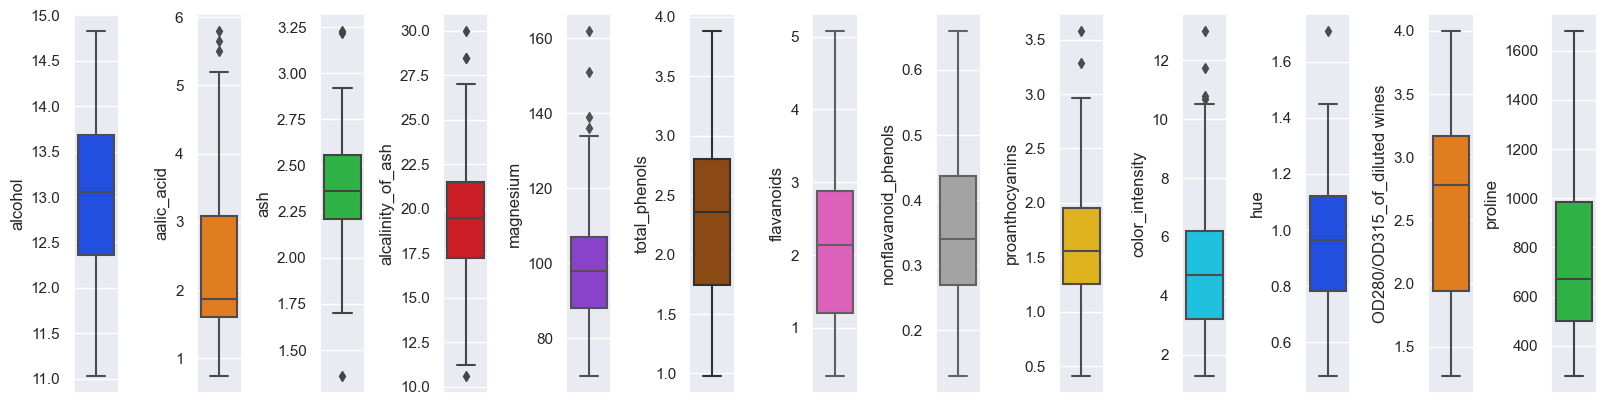

In [94]:
from seaborn.palettes import color_palette
mi_paleta = color_palette("bright", n_colors=len(X[cols].columns))

fig, axs = plt.subplots(ncols=13, nrows=1, figsize=(16, 4))
indice = 0
axs = axs.flatten()
for titulos,z in X[cols].items():
    sns.boxplot(y=titulos, data=X[cols], ax=axs[indice],color=mi_paleta[indice])
    indice += 1
plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

> Columnas con outliers y sin distribución normal:  
**aalic_acid, ash, magnesium, proanthocyanins, color_intensity, hue.** 

> Columnas sin outliers y sin distribución normal:  
**'alcohol','total_phenols', 'flavanoids', 'nonflavanoid_phenols','OD280/OD315_of_diluted wines','proline'** 

In [122]:
cols_Standard=['alcalinity_of_ash']
cols_Robust=['aalic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
cols_MinMax=['alcohol','total_phenols', 'flavanoids', 'nonflavanoid_phenols',
             'OD280/OD315_of_diluted wines','proline']

#### Crear el column transformer para cada columna con el tipo de escalado que le aplique

In [123]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Funciones
standard= StandardScaler()
robust= RobustScaler()
min_max= MinMaxScaler()

# Creación del column transformer
ct = make_column_transformer((standard,cols_Standard),
                             (robust,cols_Robust),
                             (min_max,cols_MinMax))
print(ct)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['alcalinity_of_ash']),
                                ('robustscaler', RobustScaler(),
                                 ['aalic_acid', 'ash', 'magnesium',
                                  'proanthocyanins', 'color_intensity',
                                  'hue']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['alcohol', 'total_phenols', 'flavanoids',
                                  'nonflavanoid_phenols',
                                  'OD280/OD315_of_diluted wines', 'proline'])])


#### Declaración de modelos

In [124]:
# Modelos

svc_p = svm.SVC(random_state=42)
knn_p = KNeighborsClassifier()
dt_p = DecisionTreeClassifier(random_state=42)

#### Creación de pipeline para cada modelo

In [125]:
from sklearn.pipeline import make_pipeline
#Pipeline del modelo svc
pipe_svc=make_pipeline(ct,svc_p)
pipe_svc


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['alcalinity_of_ash']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['aalic_acid', 'ash',
                                                   'magnesium',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['alcohol', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'OD280/OD315_of_diluted '
                                                   'wines',
                                                   'proline'])])),
                ('svc', SVC(random_state=42))])

In [126]:
#Pipeline del modelo knn
pipe_knn=make_pipeline(ct,knn_p)
pipe_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['alcalinity_of_ash']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['aalic_acid', 'ash',
                                                   'magnesium',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['alcohol', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'OD280/OD315_of_diluted '
                                                   'wines',
                                                   'proline'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [127]:
#Pipeline del modelo dt 
pipe_dt=make_pipeline(ct,dt)
pipe_dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['alcalinity_of_ash']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['aalic_acid', 'ash',
                                                   'magnesium',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['alcohol', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'OD280/OD315_of_diluted '
                                                   'wines',
                                                   'proline'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

> Debería observarse los modelos del pipeline, de lo contrario descargarlo en local y reproducirlo en un entorno como jupyterlab.

#### Cross-validate para todo el pipeline no solo el modelo.

In [128]:
#CV en pipeline, métrica de evulación F1
cv_f1_pipe_svc = cross_val_score(pipe_svc,X,y,cv=5,scoring='f1_macro').mean()
cv_f1_pipe_knn = cross_val_score(pipe_knn,X,y,cv=5,scoring='f1_macro').mean()
cv_f1_pipe_dt = cross_val_score(pipe_dt,X,y,cv=5,scoring='f1_macro').mean()

### Busqueda de los mejores parámetros para el pipeline mediante GridSearchCV

#### SVC

In [144]:
#Parámetros para SVC
param_svc_pipe = {}

param_svc_pipe['svc__C']=[1, 5, 10, 0.5]
param_svc_pipe['svc__coef0']=[0.0, 0.5, 1]
param_svc_pipe['svc__gamma']=('scale', 'auto')
param_svc_pipe['svc__kernel']=('poly', 'linear', 'rbf', 'sigmoid')                          

In [145]:
#GridSearchCV

svc_p_grid = svm.SVC(random_state=42)
pipe_svc_grid = make_pipeline(ct,svc_p_grid)

GS_pipe_svc = GridSearchCV(pipe_svc_grid,param_svc_pipe,cv=5,scoring='f1_macro')
GS_pipe_svc.fit(X, y)

# Imprimimos los parámetros ganadores
print("Best Score F1", GS_pipe_svc.best_score_.round(2))
print("Los mejores parámetros son:", GS_pipe_svc.best_params_)

Best Score F1 0.96
Los mejores parámetros son: {'svc__C': 5, 'svc__coef0': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}


#### KNN

In [141]:
#Parámetros para KNN
param_knn_pipe = {}
param_knn_pipe['kneighborsclassifier__n_neighbors']= [3,5,10]
param_knn_pipe['kneighborsclassifier__algorithm']= ('auto', 'ball_tree', 'kd_tree', 'brute')
param_knn_pipe['kneighborsclassifier__leaf_size']=[10, 30, 50]
param_knn_pipe['kneighborsclassifier__metric']= ('minkowski','manhattan','euclidean','chebyshev')
param_knn_pipe['kneighborsclassifier__weights']= ('uniform', 'distance')

In [142]:
#GridSearchCV KNN
knn_p_grid = KNeighborsClassifier()
pipe_knn_grid=make_pipeline(ct,knn_p_grid)

GS_pipe_knn = GridSearchCV(pipe_knn_grid,param_knn_pipe,cv=5,scoring='f1_macro')
GS_pipe_knn.fit(X, y)

# Imprimimos los parámetros ganadores
print("Best Score F1", GS_pipe_knn.best_score_.round(2))
print("Los mejores parámetros son:", GS_pipe_knn.best_params_)

Best Score F1 0.96
Los mejores parámetros son: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}


### Árbol de decisión

In [147]:
#Parámetros para Árbol de decisión
param_dt_pipe = {}
param_dt_pipe['decisiontreeclassifier__ccp_alpha'] = [0.0, 0.001, 0.01, 0.1]
param_dt_pipe['decisiontreeclassifier__criterion'] = ('gini', 'entropy')
param_dt_pipe['decisiontreeclassifier__splitter'] = ('best','random')
param_dt_pipe['decisiontreeclassifier__max_depth']= [None,10,100]              

In [149]:
#GridSearchCV Árbol de decisión
dt_p_grid = DecisionTreeClassifier(random_state=42)
pipe_dt_grid=make_pipeline(ct,dt_p_grid)

GS_pipe_dt = GridSearchCV(pipe_dt_grid,param_dt_pipe,cv=5,scoring='f1_macro')
GS_pipe_dt.fit(X, y)

# Imprimimos los parámetros ganadores
print("Best Score F1", GS_pipe_dt.best_score_.round(2))
print("Los mejores parámetros son:", GS_pipe_dt.best_params_)


Best Score F1 0.91
Los mejores parámetros son: {'decisiontreeclassifier__ccp_alpha': 0.0, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__splitter': 'best'}


### Comparación de Cross Validation antes con y sin pipeline, con parámetros y sin parámetros.

In [151]:
metricas_CV = pd.DataFrame({'Modelo': ['Support Vector Machine', 'KNN','Arbol de clasificación'],
                        'CV': [svc_cv,knn_cv,dt_cv],
                        'CV_best_params': [svc_cv_best,knn_cv_best,dt_cv_best],
                        'CV_PipeLine': [cv_f1_pipe_svc,cv_f1_pipe_knn,cv_f1_pipe_dt],   
                        'GridSearch_CV': [GS_pipe_svc.best_score_,GS_pipe_knn.best_score_,GS_pipe_dt.best_score_]})

metricas_CV.round(3)

,Modelo,CV,CV_best_params,CV_PipeLine,GridSearch_CV
0,Support Vector Machine,0.604,0.968,0.949,0.962
1,KNN,0.671,0.774,0.891,0.957
2,Arbol de clasificación,0.865,0.912,0.860,0.913


### Comparación y conclusiones
##### CV y CV_pipeline
Recordemos las variables:
* CV: es el cross validation sin aplicar: pipelines, escalado y mejora de parámetros.
* CV_pipeline: cross validation aplicando pipeline, escalado y en este caso no tiene mejora de parámetros. .

-> Se puede observar como el Support Vector Machine (clasifación) tiene una mejora significativa cuando se escalan las variables. 0.6 vs 0.945 (**56%**).  
-> El KNN también mejora al aplicar mejora de parámetros. 0.67 vs 0.891 (**33%**).  
-> Algo interesante y que también muchos autores lo dicen es que el Árbol de clasificación no necesita escalado. Acá se observa casi el mismo resultado 0.865 vs 0.860.  


##### CV_best_params y GridSearch_CV

* CV_best_params: cross validation con mejora de parámetros, sin escalar y sin pipeline.
* GridSearch_CV: es un grid search cross validation que encuentra los mejores parámetros en un pipeline y con datos escalados.

Al ralizar el gridsearch el modelo que más muestra mejora con hiperparámetros es el KNN (0.774 vs 0.957) (**24%**). 

Conclusiones generales:

1) El pipeline simula mejor lo que ocurre en la vida real y evita "leak information" al realizar el escalado en cada corte de los k-folds. Generalmente, (que no es lo correcto), se realiza el escalado sobre todo el data set y no sobre cada train/split en un cross validation.

2) El pipeline combinado con el GridSearch es muy útil y poderoso para realizar proceso ahorrando tiempo.Adicional, tiene la capacidad de encontrar los mejores parámetros en todo el proceso sin necesidad de iterarlo manualmente que sería muy complicado. 

Las herramientas de ingeniería ayudan significativamente en mejorar los modelos si se aplican en los modelos indicados. Por ejemplo, en árboles de decisión o Random forest por ejemplo, el escalado parece ser que no es
tan importante, sin embargo en otros modelos como KNN mejoran significativamente los modelos.
